## Аудиториска вежба 9: Neural Networks & Deep Learning pt.2


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [12]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [18]:
df.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")

unit="s": Ова означува дека вредностите во колоната Timestamp претставуваат време во секунди од Unix Epoch (1 Јануари 1970 година, 00:00:00 UTC). Значи, секоја вредност е број на секунди од тој почетен момент.

In [30]:
df.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.set_index(keys=["Timestamp"], inplace=True)

ја поставува колоната timestamp како индекс

In [28]:
df.sort_index(inplace=True)

In [34]:
df = df["2021-03-20 00:00:00":].copy(deep=True)

подмножество од редовите во оригиналниот DataFrame започнувајќи од 2021-03-20 00:00:00 па натаму.

In [37]:
df.ffill(inplace=True)

In [39]:
df.head()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-20 00:00:00,58029.94,58056.38,57984.41,57984.41,0.586071,3.401285e+04,58035.397366
2021-03-20 00:01:00,57984.41,58018.74,57850.00,57898.50,11.624454,6.737002e+05,57955.426395
2021-03-20 00:02:00,57898.49,57923.95,57815.61,57902.49,7.170489,4.149455e+05,57868.515170
2021-03-20 00:03:00,57971.49,58183.82,57971.49,58093.58,42.251243,2.456207e+06,58133.373299
2021-03-20 00:04:00,58077.09,58137.00,58020.43,58020.43,6.994187,4.066059e+05,58134.832915


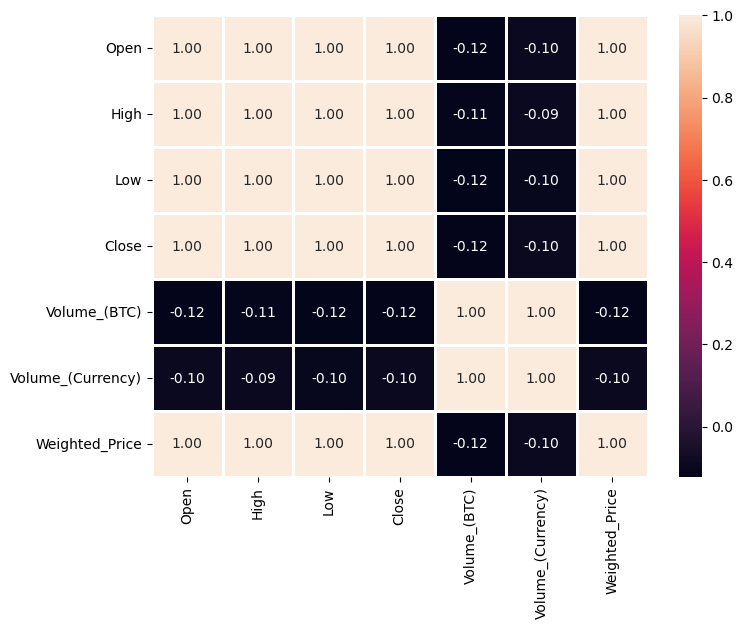

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

In [43]:
df = df[["Close"]].copy()

In [47]:
lag = 3

In [49]:
periods = range(lag, 0, -1) # 3, 2, 1

lag = 3: Ова ја поставува вредноста на lag на 3.

periods = range(lag, 0, -1): Ова создава објект на распон од броеви почнувајќи од 3 и завршувајќи на 1, намалувајќи се по 1 на секој чекор. Во овој случај, резултатот ќе биде range(3, 0, -1), што означува броеви 3, 2, 1.

Пресметување на промени низ време: Кога работите со временски серии (time series) и сакате да видите какви промени се случуваат од еден период на друг. На пример, ако имате податоци за продажба или температура, може да сакате да ги видите разликите помеѓу денешната и вчерашната продажба или температура. Користејќи shift(), можете да ја добиете претходната вредност во однос на тековната.

In [54]:
df.shift(periods=periods)

,Close_3,Close_2,Close_1
Timestamp,,,
2021-03-20 00:00:00,NaN,NaN,NaN
2021-03-20 00:01:00,NaN,NaN,57984.41
2021-03-20 00:02:00,NaN,57984.41,57898.50
2021-03-20 00:03:00,57984.41,57898.50,57902.49
2021-03-20 00:04:00,57898.50,57902.49,58093.58
...,...,...,...
2021-03-30 23:56:00,58698.50,58739.95,58714.31
2021-03-30 23:57:00,58739.95,58714.31,58686.00
2021-03-30 23:58:00,58714.31,58686.00,58685.81


In [56]:
df = pd.concat([df, df.shift(periods=periods)], axis=1)

In [58]:
df.head()

,Close,Close_3,Close_2,Close_1
Timestamp,,,,
2021-03-20 00:00:00,57984.41,NaN,NaN,NaN
2021-03-20 00:01:00,57898.50,NaN,NaN,57984.41
2021-03-20 00:02:00,57902.49,NaN,57984.41,57898.50
2021-03-20 00:03:00,58093.58,57984.41,57898.50,57902.49
2021-03-20 00:04:00,58020.43,57898.50,57902.49,58093.58


In [60]:
df.dropna(axis=0, inplace=True)

In [62]:
df.head()

,Close,Close_3,Close_2,Close_1
Timestamp,,,,
2021-03-20 00:03:00,58093.58,57984.41,57898.50,57902.49
2021-03-20 00:04:00,58020.43,57898.50,57902.49,58093.58
2021-03-20 00:05:00,57942.98,57902.49,58093.58,58020.43
2021-03-20 00:06:00,57970.36,58093.58,58020.43,57942.98
2021-03-20 00:07:00,57944.74,58020.43,57942.98,57970.36


In [64]:
X, y = df.drop(columns=["Close"]), df["Close"]

In [66]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

In [68]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [70]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [72]:
train_X.shape[0]

12670

In [76]:
lag

3

In [80]:
train_X.shape[1] // 3


1

In [82]:
(train_X.shape[0], lag, (train_X.shape[1] // lag)) # (samples, timesteps, features)

(12670, 3, 1)

In [84]:
train_X = train_X.reshape(train_X.shape[0], lag, (train_X.shape[1] // lag))
test_X = test_X.reshape(test_X.shape[0], lag, (test_X.shape[1] // lag))

In [86]:
(train_X.shape[1], train_X.shape[2])

(3, 1)

In [90]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(8, activation="relu", return_sequences=True),
    LSTM(4, activation="relu"),
    Dense(1, activation="linear")
])

LSTM (Long Short-Term Memory) слоеви

train_X.shape[1] е бројот на временски чекори (timesteps) во секој примерок.

train_X.shape[2] е бројот на карактеристики (features) во секој временски чекор.

Со ова се дефинира влезот како (timesteps, features), што е потребно за LSTM модели кои работат со временски серии.

return_sequences=True: Ова значи дека овој LSTM слој ќе врати цели временски серии за секој примерок

In [96]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 3, 8)                │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 4)                   │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 533 (2.08 KB)

 Trainable params: 533 (2.08 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [100]:
history = model.fit(train_X, train_y, validation_split=0.2, epochs=4, batch_size=16, shuffle=False)


Epoch 1/4
634/634 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2667 - mean_squared_error: 0.2667 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 2/4
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 3/4
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 4/4
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


<Axes: >

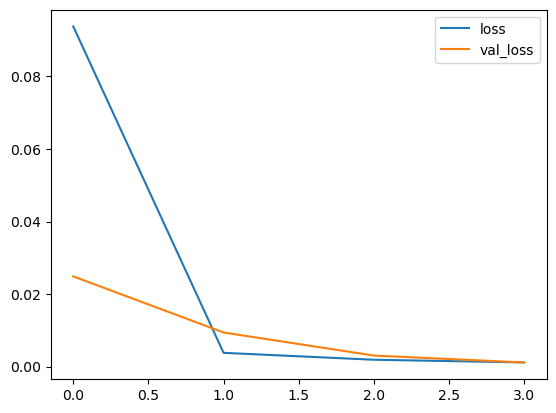

In [102]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [104]:
pred_y = model.predict(test_X)

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [106]:
pred_y = scaler.inverse_transform(pred_y)


In [110]:
r2_score(test_y, pred_y)

0.8314676898881921